<a href="https://colab.research.google.com/github/Simran085/ML_LAB_ASS_102216115/blob/main/A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q2. Use the weather dataset to implement the decision tree. Try different
available parameters of the inbuilt method.


Saving weather.csv to weather (6).csv
    Outlook  Temp Humidity  Windy  Play
0     rainy   hot     high      0     0
1     rainy   hot     high      1     0
2  overcast   hot     high      0     1
3     sunny  mild     high      0     1
4     sunny  cool   normal      0     1
Index(['Outlook', 'Temp', 'Humidity', 'Windy', 'Play'], dtype='object')
Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5


Confusion Matrix:
 [[1 1]
 [0 3]]


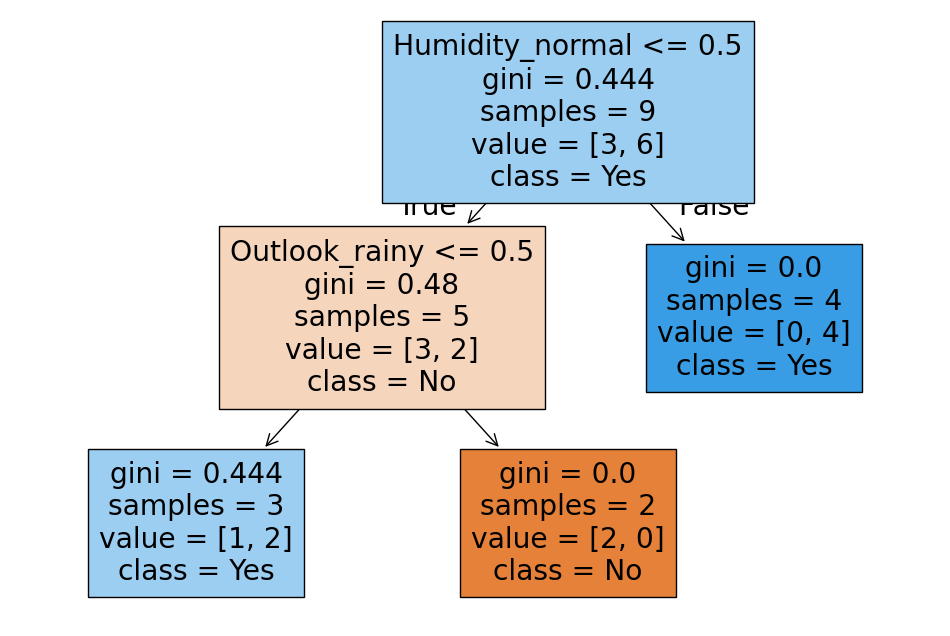

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Load the uploaded dataset (replace 'weather.csv' with the actual file name)
data = pd.read_csv(list(uploaded.keys())[0])

# Check the data (if needed)
print(data.head())
print(data.columns)

# Preprocess the dataset
# Convert categorical features to dummy variables (One-Hot Encoding)
data = pd.get_dummies(data, columns=['Outlook', 'Temp', 'Humidity', 'Windy'], drop_first=True)

# Define features (X) and target (y)
X = data.drop(columns=['Play'])  # Features
y = data['Play']  # Target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=5)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()
